# Towards Evaluating Creativity in Language

This notebook is a prototype for evaluating creativity in language. It is based on the paper [Towards Evaluating Creativity in Language](https://arxiv.org/abs/1904.09751) by [Rudinger et al.](https://arxiv.org/abs/1904.09751) (2019).
^ bruh copilot at it again

In [3]:
from classes.benchmark import *
from classes.models import *
from nltk.corpus import gutenberg

In [4]:
%time bench = CreativityBenchmark(gutenberg.raw("austen-emma.txt"), "Emma")
%time bench.report()

CPU times: user 2.67 s, sys: 48.6 ms, total: 2.72 s
Wall time: 2.73 s
Report took ~0.054s
Text (Emma)
    N words: 	 185438
    N sentences: 	 7456
    Average word length: 	     3.919
    Average sentence length: 	   117.232
    Average number of tokens per sentence: 	 25.722
    Average number of content words: 	 15.106 (As proportion: 60.737%)
    
CPU times: user 53 ms, sys: 828 µs, total: 53.9 ms
Wall time: 54 ms


### Potential creativity measures
#### Usage of less common vocabulary uncommon words
**Example:**
- "The quick brown fox jumps over the lazy dog."
- "The swift hazel-furred fox leaps over the idle dog."

**Idea:**

Adapt resources such as WordNet for finding semantically similar words and compare them to their most used synonym. Notion: The more uncommon the word, the more creative the sentence.
Potential problems: words could be too far off from their actual meaning in the context. For example, here "leaps" is a synonym for "jumps", but using the word "vaults" or "springs" might not fit the context.


#### Comparing alternatives for bi(+)grams 
(Generally, we want to narrow down on adjectives and noun phrases, but this could be expanded to verb phrases for example.)  
**Two variants:**
1. Compare how much the original word deviates in comparison to contextual synonyms/alternatives. That is, compare $ P(w_{original}|context) $ with $ \{P(w| context) | w \text{ in the set of alternative continuations}\} $. **This is somewhat akin to the perplexity measure, I believe?**
   - *Example:* (The following has been generated by Copilot) Given the sentence "The quick brown fox jumps over the lazy dog.", the context word is "fox" and the alternative contexts are "dog" and "cat". The probability of "jumps" given "fox" is compared to the probabilities of "jumps" given "dog" and "cat". 
   - **Alternatively**, to simplify the formulas, we can compare the deviation of probability $ P(w_{original}|context) $ with respect to the likeliest/largest/maximum element in the set of probability distribution described above, i.e. $\max (\{ P(w|context) | w \in S_{Alternatives}\})$ 


2. Compare the deviation of probability $ P(word|modifier) $ with respect to the set $ \{P(word| alt) | alt \text{ in the set of alternative modifiers}\}$
   - *Example:* Given the sentence "The quick *brown* **fox** jumps over the lazy dog.", the $word$ is **"fox"** and the $modifier$ is *"brown"*. Then, the alternative modifiers can be "black", "reddish", or even "blue".
   - This can be summarised by doing evaluation on the noun phrase level. I'd personally prefer focusing on the prepositional modifier words.

Possible algorithm for measuring number of tokens per sentence:
1. Split the text into sentences using the sentence tokenizer.
2. For each sentence, split it into tokens using the word tokenizer.

Additionally, plot the distribution of the number of tokens per sentence.
Additionally, plot the distribution of different PoS tags per sentence.
Do this for a few genres and compare them. PLOT PLOTS PLOTS


### Distance measure based on semantic tree traversal
**Idea:**

- Given a sentence, tag words into parts of speech using the Universal tagset (we prefer not to use the PennTreebank tagset as it is too English-specific and would not mesh well with WordNet).
- Filter only to nouns, adjectives, verbs, and adverbs. 
- Given each tagged word, we find its synset (i.e. the set of synonyms) in WordNet.
- Compute some distance metric between the synsets of the two words. For example, we can use the [Wu-Palmer similarity](https://www.nltk.org/howto/wordnet.html) measure.
- How do we calculate that for all the words in a given text/sentence? 

#### Potential Issues
Potential issues with this approach may include:
- The use of WordNet. It is a good resource, but it is not perfect. For example, it does not contain all the words in the English language.
- Setting. For example, some words may not be subsititutable in certain context. Say, the collocation "big sister" cannot be replaced with "large sister" or "huge sister". It completely alters the meaning of the phrase. For example, the word H2O is used in scientific contexts and would be inappropriate in a hiking guide—water would be more appropriate— and this genre difference is part of the meaning of the word. In practice, the word syn- onym is therefore used to describe a relationship of approximate or rough synonymy. \cite{jurafsky2014speechorwhatever}
- 
- 

#### Additional Datasets
For example the SimLex-999 dataset (Hill et al., 2015) gives values on a scale from 0 to 10, like the examples below, which range from near-synonyms (vanish, disappear) to pairs that scarcely seem to have anything in common (hole, agreement):
| word1 | word2| score |
|--------|-----------|-----|
| vanish | disappear | 9.8 |
| hole   | agreement | 1.2 |


Early work on affective meaning (Osgood et al., 1957) found that words varied along three important dimensions of affective meaning:
valence: the pleasantness of the stimulus
arousal: the intensity of emotion provoked by the stimulus dominance: the degree of control exerted by the stimulus

Osgood et al. (1957) noticed that in using these 3 numbers to represent the meaning of a word, the model was representing each word as a point in a three- dimensional space, a vector whose three dimensions corresponded to the word’s rating on the three scales. This revolutionary idea that word meaning could be rep- resented as a point in space (e.g., that part of the meaning of heartbreak can be represented as the point [2.45,5.65,3.58]) was the first expression of the vector se- mantics models that we introduce next. **You can paraphrase this**

In [3]:
# This implementation is shit, aye?
from nltk import wsd
from nltk.corpus import wordnet as wn
import pywsd

sentence = "The quick brown fox jumps over the lazy dog"
words = nltk.word_tokenize(sentence)
tagged: list[tuple[str,str]] = nltk.pos_tag(words, tagset='universal')
universal_to_wn = {'NOUN': wn.NOUN,
                   'VERB': wn.VERB, 'ADJ': wn.ADJ}
for word, tag in tagged:
    if tag not in universal_to_wn.keys():
        continue
    actual_word = pywsd.simple_lesk(sentence, word, universal_to_wn[tag])
    for method in [pywsd.simple_lesk, pywsd.cosine_lesk]:
        actual_word = method(sentence, word, universal_to_wn[tag])
        print(
            f"{word} - {tag} - {actual_word} - {word2vec_model.similarity(word, 'canine')} - {actual_word.definition() if actual_word else ''}")
    # print(
    #     f"{word} - {tag} - {actual_word, actual_word.definition() if actual_word else ''} - {wn.synsets(word, pos=universal_to_wn[tag])}")


quick - ADJ - Synset('agile.s.01') - 0.07056773453950882 - moving quickly and lightly
quick - ADJ - Synset('agile.s.01') - 0.07056773453950882 - moving quickly and lightly
brown - NOUN - Synset('brown_university.n.01') - 0.12424251437187195 - a university in Rhode Island
brown - NOUN - Synset('brown.n.01') - 0.12424251437187195 - an orange of low brightness and saturation
fox - NOUN - Synset('fox.n.07') - 0.31961506605148315 - the Algonquian language of the Fox
fox - NOUN - Synset('fox.n.03') - 0.31961506605148315 - the grey or reddish-brown fur of a fox
jumps - VERB - Synset('startle.v.02') - 0.0884588360786438 - move or jump suddenly, as if in surprise or alarm
jumps - VERB - Synset('jump.v.06') - 0.0884588360786438 - enter eagerly into
lazy - ADJ - Synset('lazy.s.01') - 0.05496400594711304 - moving slowly and gently
lazy - ADJ - Synset('lazy.s.01') - 0.05496400594711304 - moving slowly and gently
dog - NOUN - Synset('pawl.n.01') - 0.6918289065361023 - a hinged catch that fits into a

Plot average concreteness of words in a sentence

^^ 


## Alternative implementation for semantic distance measure which abuses masked language models for context-aware words

Initialize models

In [4]:
def predict_tokens(sent: str, masked_word: str, model, word2vec_model, return_tokens: bool = False, k: int = 20) -> list[tuple]:
    """Predict the top k tokens that could replace the masked word in the sentence. 
    
    Returns a list of tuples of the form (token, likelihood, similarity) where similarity is the cosine similarity of the given words in a word2vec model.
    
    Parameters
    ----------
    sent: str
        The sentence to predict tokens for.
    masked_word: str
        The word to predict tokens for. Note that this word must be in the sentence.
    model
        Must be a masked language model that takes in a sentence and returns a tensor of logits for each token in the sentence. Default assumes a pretrained BERT model from the HuggingFace `transformers` library.
    word2vec_model
        Must be a word2vec model that takes in a word and returns a vector representation of the word.
        Default is `gensim.models.keyedvectors.KeyedVectors` loaded from the `word2vec_sample` model from the `nltk_data` package.
    k: int
        The number of tokens to return.    
        
    Returns
    -------
    List of tuples the form (token, likelihood, similarity)
    
    token: str
        The predicted token.
    likelihood: float
        The likelihood of the token being the masked word.
    similarity: float
        The cosine similarity of the token and the masked word.
    """
    if masked_word not in sent:
        raise ValueError(f"{masked_word} not in {sent}")
    masked_sent = sent.replace(masked_word, "[MASK]")

    inputs = tokenizer(masked_sent, return_tensors="pt")

    with torch.no_grad():
        logits = model(**inputs).logits

    # retrieve index of [MASK]
    mask_token_index = (inputs.input_ids == tokenizer.mask_token_id)[
        0].nonzero(as_tuple=True)[0]

    vals, predicted_token_ids = torch.topk(logits[0, mask_token_index], k, dim=-1)
    
    ret = []
    for i, predicted_token_id in enumerate(predicted_token_ids[0]):
        word = tokenizer.decode(predicted_token_id)
        
        # If word is a subword, combine it with the previous word
        if word.startswith("##"): 
            word = masked_word+word[2:]

        try:
            # Calculate the measured cosine similarity between the predicted word and the masked word
            similarity = word2vec_model.similarity(masked_word, word)
        except KeyError:
             # If the word is not in the word2vec model, skip it
            continue

        if return_tokens:
            ret.append((word, vals[0,i].item(), similarity))
        else: 
            ret.append((vals[0,i].item(), similarity))
    
    # print(logits)
    # print(logits[0, mask_token_index].sort(descending=True))
    return ret


### Issues with Word2Vec
Does not quite capture part of speech senses.

In [6]:
bench = CreativityBenchmark(nltk.corpus.gutenberg.raw('austen-emma.txt'))
bench_2 = CreativityBenchmark(nltk.corpus.brown.)

In [5]:
sent = "The quick brown fox jumped over the lazy dog."
words = nltk.pos_tag(nltk.word_tokenize(sent.lower()), tagset='universal')
stopwords = set(nltk.corpus.stopwords.words('english'))
results = []
for word, tag in words:
    # Early stopping
    if word in stopwords or tag not in tags_of_interest:
        continue
    
    predicted_tokens = predict_tokens(sent, word, model, word2vec_model, k=1)
    results.append((word, pd.DataFrame(predicted_tokens, columns=['Word', 'Likelihood', 'Similarity'])))


NameError: name 'tags_of_interest' is not defined

Cosine similarity returns values in the range of $[0,1]$. 

In [2]:
words = nltk.pos_tag(nltk.word_tokenize(sent.lower()), tagset='universal')
stopwords = set(nltk.corpus.stopwords.words('english'))

results = []
debug_words  = []
for word, tag in words:
    # Early stopping
    if word in stopwords or tag not in tags_of_interest:
        continue
    
    predicted_tokens = predict_tokens(sent, word, model, word2vec_model, return_tokens=False)
    results.append(predicted_tokens)
    debug_words.append(word)

results = [np.array(result) for result in results]

NameError: name 'sent' is not defined

#### Benchmarking insights for speed concerns
Torch objects and NumPy arrays have effectively the same speed. However, NumPy arrays are more memory efficient.

In [171]:
def cross_softmax(x: np.ndarray, y: np.ndarray, temp1=0.5, temp2= 0.5):
    # return (torch.softmax(torch.from_numpy(results[1][:,0]), dim=0) @ torch.softmax(torch.from_numpy(results[1][:,1]), dim=0)).item()
    exps = np.exp(x*temp1)
    exps /= exps.sum()
    exps2 = np.exp(y*temp2)
    exps2 /= exps2.sum()
    return exps @ exps2

for result in results:
    cross_softmax(result[:,0], result[:,1])

The first 100 sentences of Brown corpus (~1000 tokens) need 1.5 minutes to be processed. Not based at all.

In [226]:
res = []
debug_words = []
for sent in brown.sents()[:10000]:
    if type(sent) == str:
        tokens = nltk.word_tokenize(sent.lower())
    else:
        tokens = [token.lower() for token in sent]
        sent = " ".join(tokens)
    words = nltk.pos_tag(tokens, tagset='universal')

    results = []
    for word, tag in words:
        # Early stopping
        if word in stopwords or tag not in tags_of_interest:
            continue

        predicted_tokens = predict_tokens(
            sent, word, model, word2vec_model, return_tokens=False)
        results.append(predicted_tokens)
        debug_words.append(word)

    results = [np.array(result) for result in results]

    for result in results:
        # Some lists may be empty
        if len(result) == 0:
            res+= [0.0]
        else:
            res += [cross_softmax(result[:,0], result[:,1])]

(165,
 165,
 165,
 tensor(0.0534, dtype=torch.float64),
 tensor(0.0565, dtype=torch.float64))

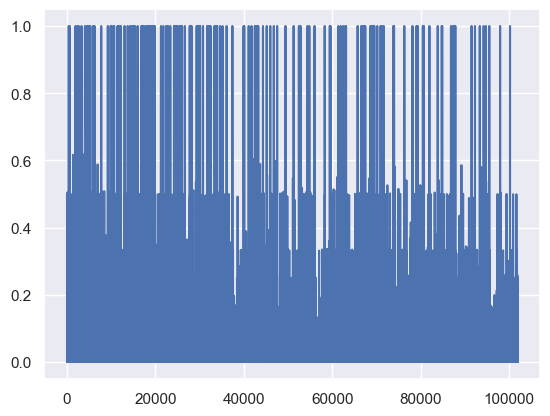

In [235]:
tense = torch.tensor([r for r in res])
plt.plot(tense)
len(torch.nonzero(tense > 0.8)), len(torch.nonzero(tense > 0.9)), len(torch.nonzero(tense == 1.0)), tense.mean(), tense.std()

In [221]:
%%prun

def softmax_pure_python(x, y, temp1=0.5, temp2= 0.5):
    exps = [exp(x_*temp1) for x_ in x]
    sum_exps = sum(exps)
    exps = [exp_ / sum_exps for exp_ in exps]
    exps2 = [exp(y_*temp2) for y_ in y]
    sum_exps2 = sum(exps2)
    exps2 = [exp_ / sum_exps2 for exp_ in exps2]
    
    return np.array(exps) @ np.array(exps2)

for i in range(10000):
    for result in results:
        # print(len(result))
        if len(result) == 0:
            continue
        # softmax_pure_python(result[:,0], result[:,1])
        softmax(result[:,0], result[:,1])

         920003 function calls in 2.157 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   110000    1.192    0.000    1.908    0.000 4282816048.py:6(softmax)
   220000    0.548    0.000    0.548    0.000 {method 'reduce' of 'numpy.ufunc' objects}
        1    0.227    0.227    2.157    2.157 <string>:1(<module>)
   220000    0.092    0.000    0.716    0.000 {method 'sum' of 'numpy.ndarray' objects}
   220000    0.076    0.000    0.624    0.000 _methods.py:46(_sum)
   150000    0.022    0.000    0.022    0.000 {built-in method builtins.len}
        1    0.000    0.000    2.157    2.157 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}

## Similar idea, but sentence-level instead of word-level
Use `BertForNextSentencePrediction` to determine how "unpredictable" the following sentence is given the previous sentence (as prompt). We mask the second sentence and take something like a cosine similarity / set difference between the two vectors.

In [1]:
from transformers import BertForNextSentencePrediction
model = BertForNextSentencePrediction.from_pretrained("bert-base-uncased")

prompt = "In Italy, pizza served in formal settings, such as at a restaurant, is presented unsliced."
next_sentence = "The sky is blue due to the shorter wavelength of blue light."

encoding = tokenizer(prompt, next_sentence, return_tensors="pt")
outputs = model(**encoding, labels=torch.LongTensor([1]))

logits = outputs.logits
print(logits[0, 0], logits[0, 1])  # next sentence was random


: 

: 

## Notes
- What current approaches to creativity evaluation have been implemented so far?

### Related Work
- Current methods/similar work with POS tags, proof that POS tags are (not) enough to capture creativity


### Putting some ideas of the notebook into the thesis

### Write down some methodology or datasets 

### Write down some datasets for the experiment

### Draw some comparisons between the suggested replacements in the masked model - maybe mean, cosine similarity, etc.
- Maybe use stuff like word2vec to show differences between the words